In [2]:
### 1. Import libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
retail = pd.DataFrame([])
sheets = ['Year 2009-2010', 'Year 2010-2011']

for s in sheets:
    retail = pd.concat([retail, pd.read_excel('online_retail.xlsx', sheet_name = s)], ignore_index = True)
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
retail.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [10]:
### How many customers are there in the dataset?

retail['Customer ID'].nunique()

5942

In [35]:
### Describe the dataset with the necessary information?

retail[['Description', 'Country']].describe()

,Description,Country
count,1062989,1067371
unique,5698,43
top,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,5918,981330


In [ ]:
data[retail ['Price'] < 0]

In [19]:
Is there any abnormal type for each feature?

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [13]:
retail.isna().sum()/len(retail)

Invoice        0.000000
StockCode      0.000000
Description    0.004105
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.227669
Country        0.000000
dtype: float64

In [14]:
###  How many unique values are there in each feature?
retail.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

<AxesSubplot:>

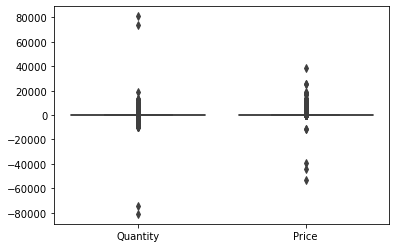

In [38]:
### Are there any outliers in each feature?
sns.boxplot(data = retail[['Quantity', 'Price']])

In [15]:
retail.duplicated().sum()

34335

In [16]:
### 3. Data cleaning and preprocessing 


In [18]:
# Remove the outlier if any
q1 = retail['Quantity'].quantile(0.25)
q3 = retail['Quantity'].quantile(0.75)

IQR = q3 - q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [19]:
retail['Quantity_R0'] = pd.DataFrame(np.where(retail['Quantity'] > upper_limit, upper_limit,
                                                (np.where(retail['Quantity'] < lower_limit, lower_limit,
                                                          retail['Quantity']))))
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity_R0'>

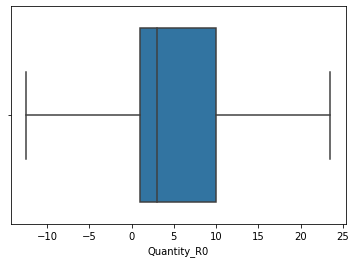

In [20]:
sns.boxplot(retail['Quantity_R0'])  

In [28]:
# Remove the missing values if any.
q1 = retail['Price'].quantile(0.25)
q3 = retail['Price'].quantile(0.75)

IQR = q3 - q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [29]:
# Remove the missing values if any.
retail['Price_R0'] = pd.DataFrame(np.where(retail['Price'] > upper_limit, upper_limit,
                                                (np.where(retail['Price'] < lower_limit, lower_limit,
                                                          retail['Price']))))
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0,Price_R0
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0,6.95
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,23.5,2.10
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,23.5,1.25


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_R0'>

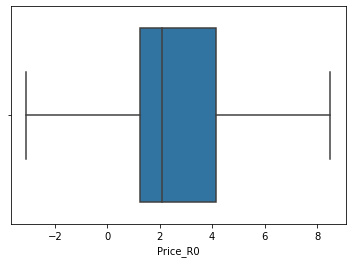

In [30]:
sns.boxplot(retail['Price_R0'])  

<AxesSubplot:>

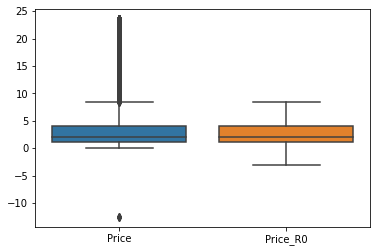

In [31]:
sns.boxplot(data = retail[['Price', 'Price_R0']])

In [52]:
# Convert the date to datetime format.
import datetime
dt = datetime.datetime.strptime('InvoiceDate', '%Y/%m/%d %H:%M:%S')


ValueError: time data 'InvoiceDate' does not match format '%Y/%m/%d %H:%M:%S'

In [5]:
pwd

'C:\\Users\\admin'